# Importing necessary Libraries and loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Loading Data

In [ ]:
columns = pd.read_csv('dataset/spambase.names', skiprows=32, sep=':\s+', engine='python', names=['attr', ''])
columns = columns['attr']
columns = list(columns)
columns.append('class')

spamData = pd.read_csv('dataset/spambase.data', names=columns)
spamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Getting to know the data

In [ ]:
spamData.shape

(4601, 58)

### Checking for null values

In [ ]:
spamData.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Checking for Duplicate Values

In [ ]:
duplicate_Vals = len(spamData)-len(spamData.drop_duplicates())
print("Total Duplicate Value Count:",duplicate_Vals )

Total Duplicate Value Count: 391


### Removing Duplicate values

In [ ]:
spamData.drop_duplicates(inplace=True)

In [ ]:
spamData.shape

(4210, 58)

### Checking Dataset's Info 

In [ ]:
spamData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

### Plotting the distribution of the target variable

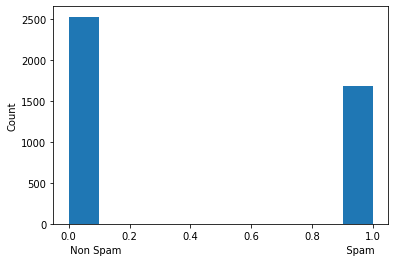

In [35]:
plt.hist(spamData['class'])
plt.xlabel(' Non Spam                                                                        Spam')
plt.ylabel('Count')
plt.show()

### Class Function Factor 

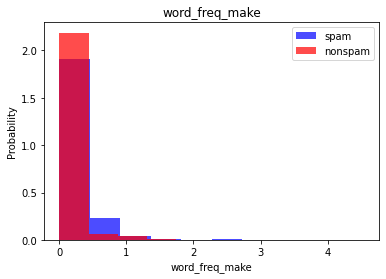

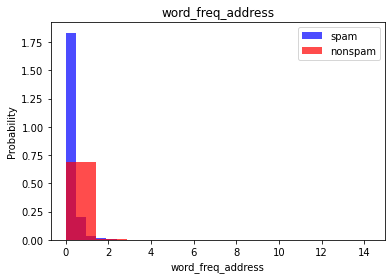

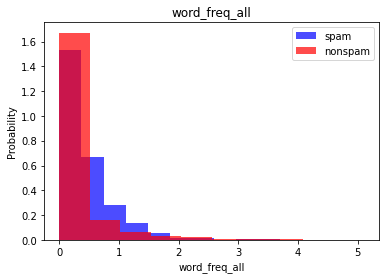

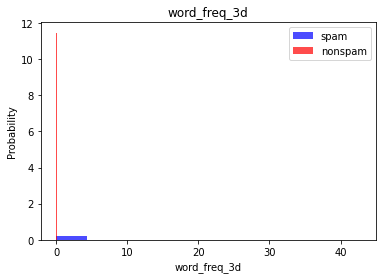

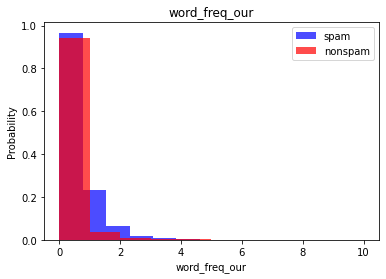

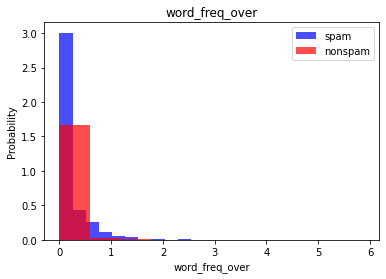

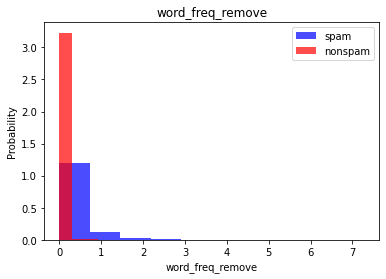

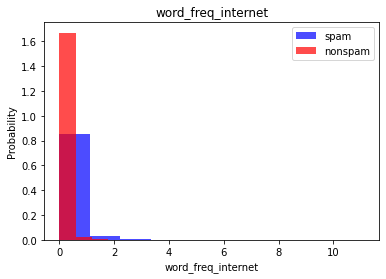

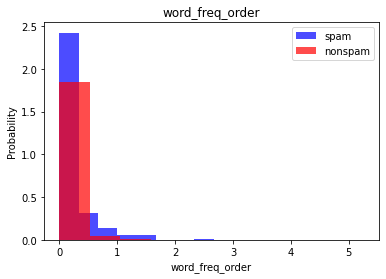

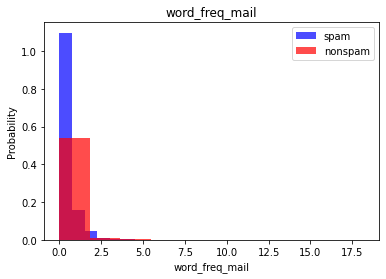

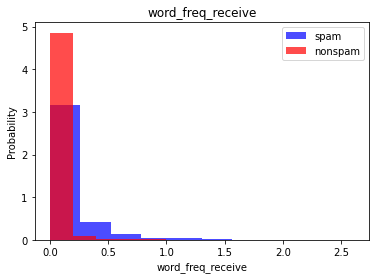

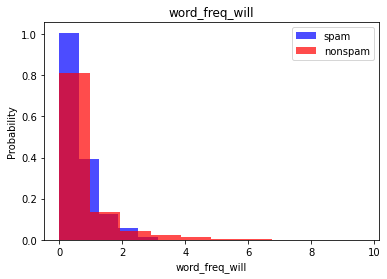

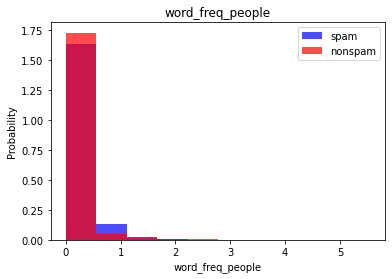

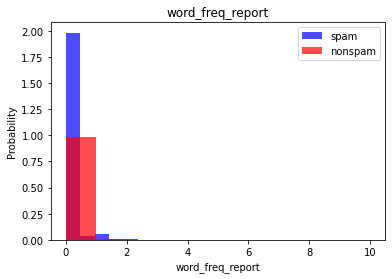

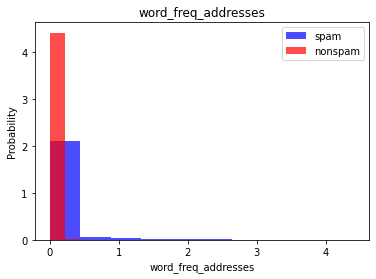

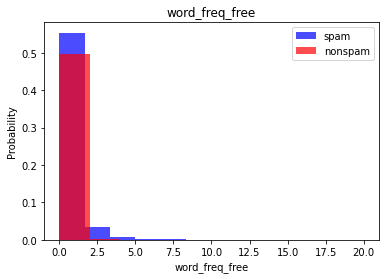

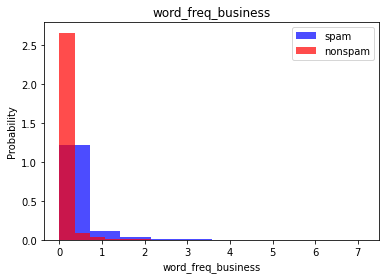

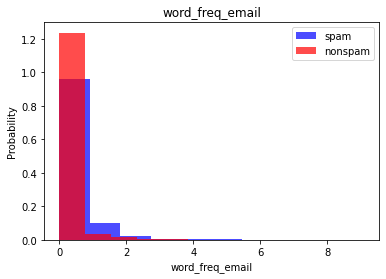

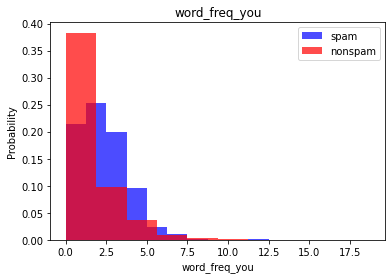

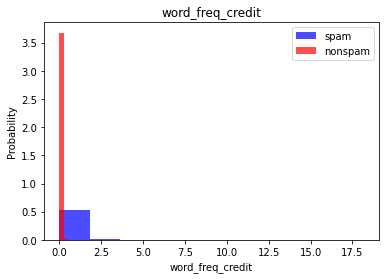

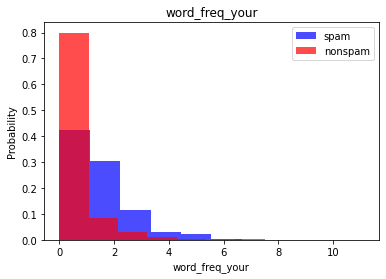

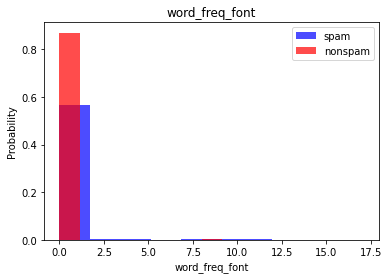

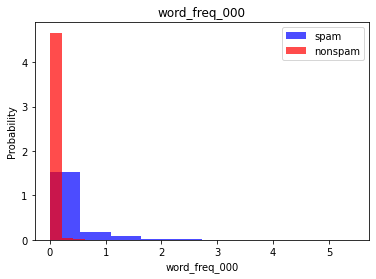

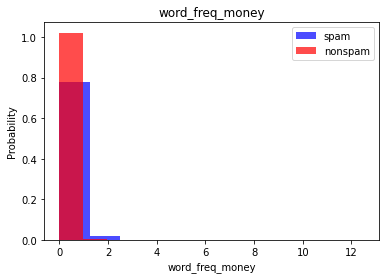

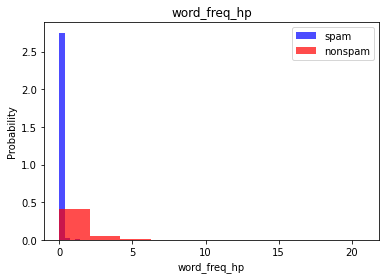

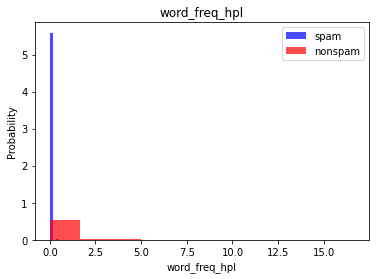

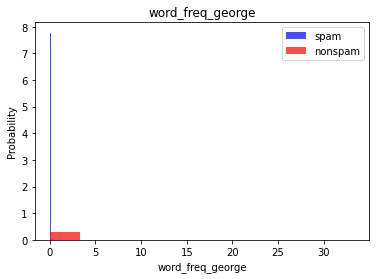

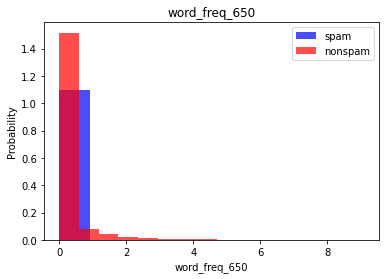

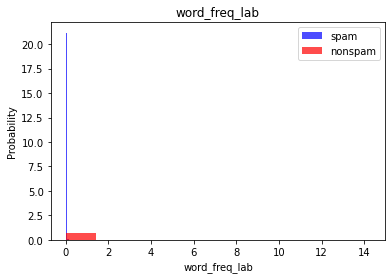

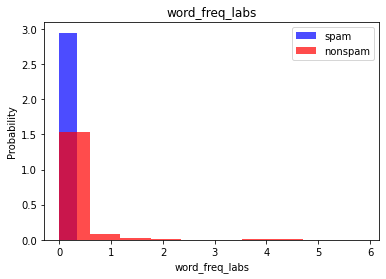

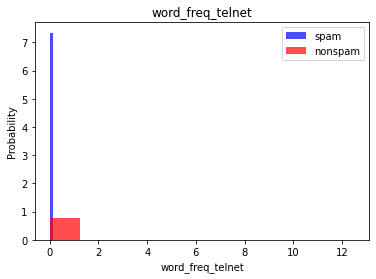

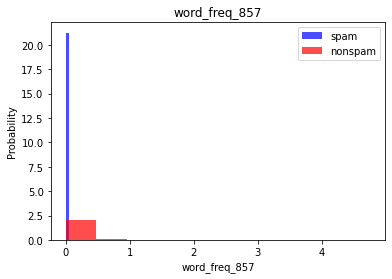

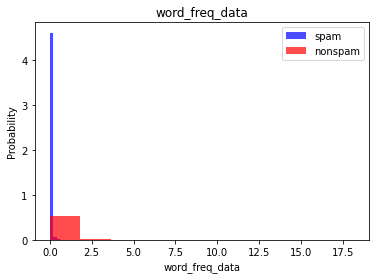

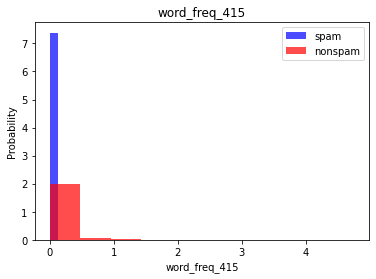

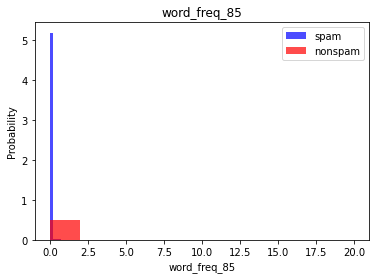

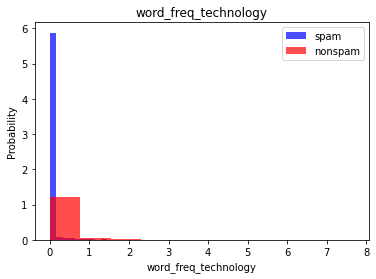

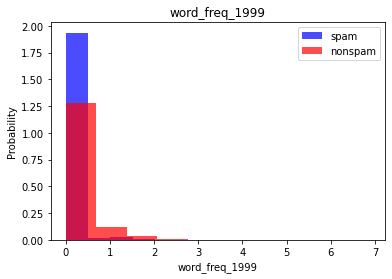

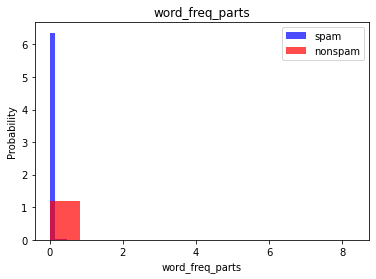

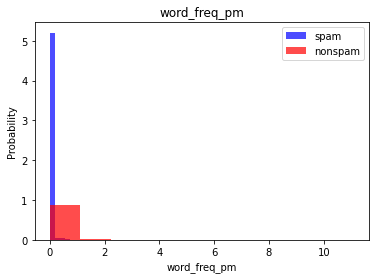

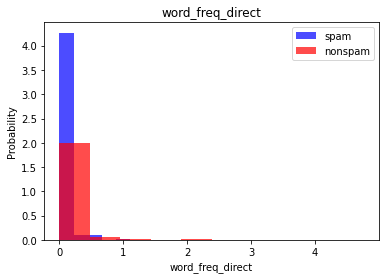

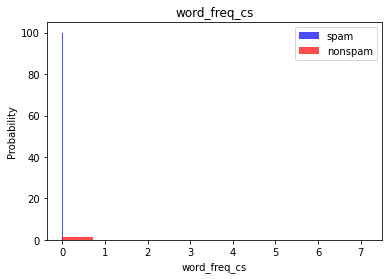

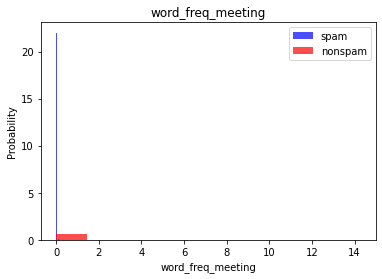

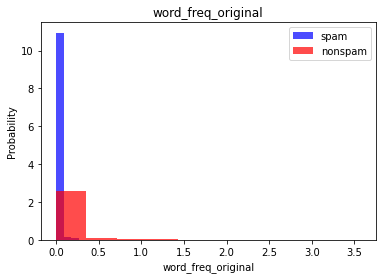

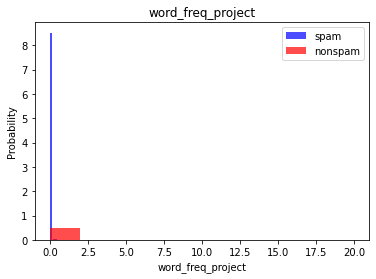

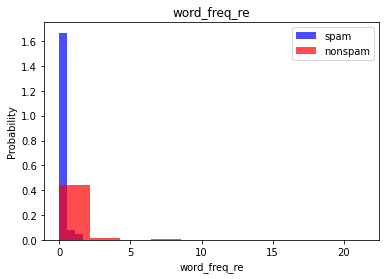

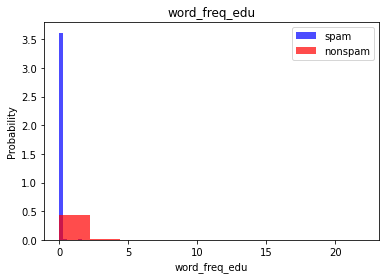

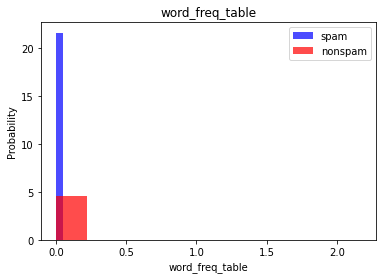

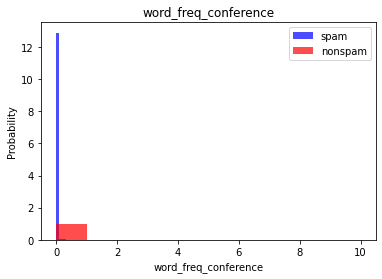

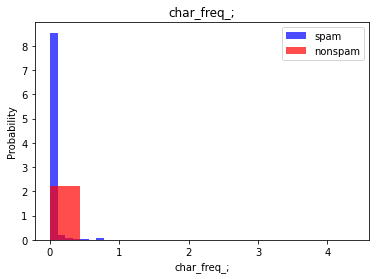

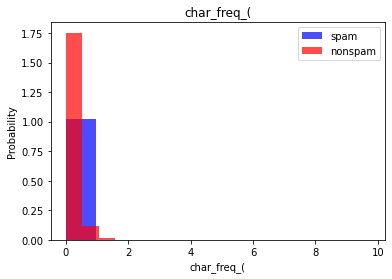

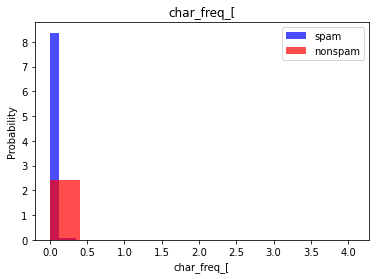

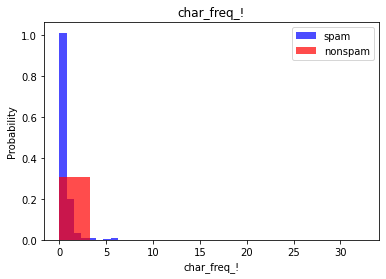

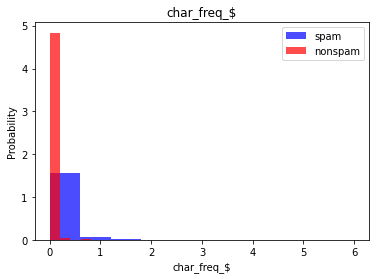

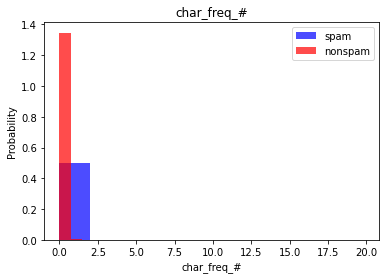

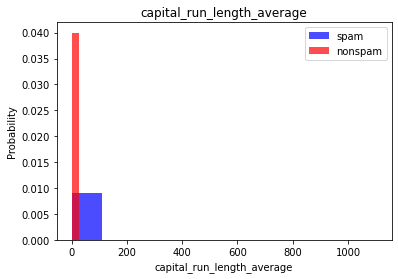

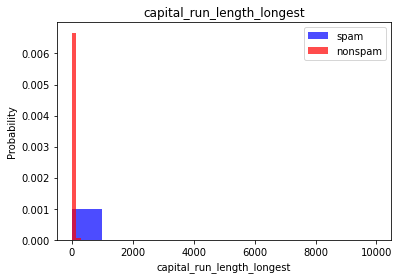

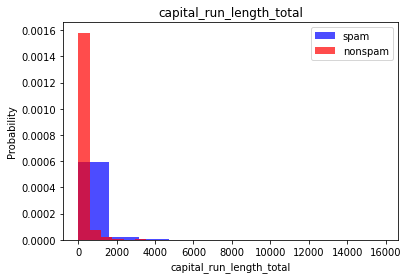

In [ ]:
for label in columns[:-1]:
  plt.hist(spamData[spamData["class"]==1][label],color='blue',label='spam',alpha=0.7,density=True)
  plt.hist(spamData[spamData["class"]==0][label],color='red',label='nonspam',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

### Plotting the correlation matrix of the features

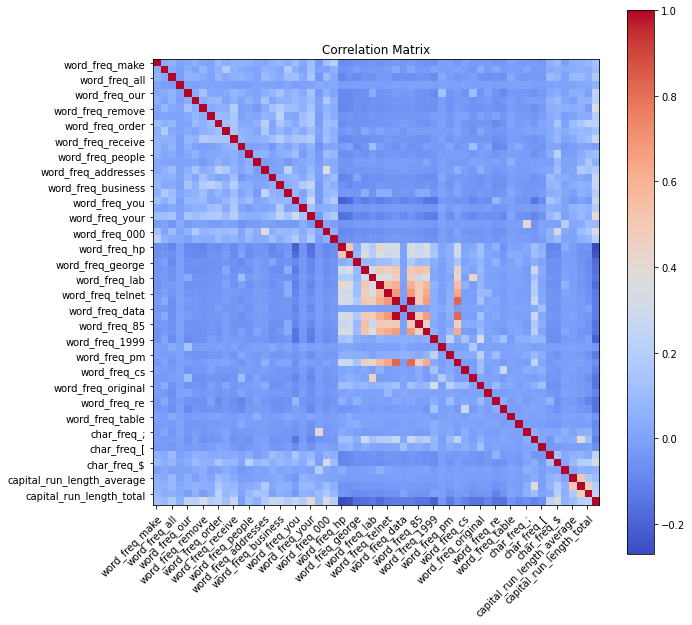

In [28]:
corr_matrix = spamData.corr()

fig, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(corr_matrix, cmap='coolwarm')

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_matrix.columns))[::2])
ax.set_yticks(np.arange(len(corr_matrix.index))[::2])
ax.set_xticklabels(corr_matrix.columns[::2])
ax.set_yticklabels(corr_matrix.index[::2])
ax.set_title('Correlation Matrix')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

# Setting up the KNN Model

## Splitting the dataset into features and target variable

In [109]:
X = spamData.iloc[:, :-1]  
y = spamData.iloc[:, -1]   


## Split train and test data

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Selection

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

## K-Fold Cross Validation 

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn_cv = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn_cv, X, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.74821853 0.77315914 0.79453682 0.79809976 0.70783848]
cv_scores mean:0.7643705463182898


In [113]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [114]:
# top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [115]:
# mean of top performers
knn_gscv.best_score_

0.7717339667458432

## Fitting classifier to the Training set

In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

# Prediction

In [117]:
# Displaying first 5 model predictions on the test data

y_predict = classifier.predict(X_test)

print(y_predict[:5])

[1 0 0 1 0]


# Evaluation

## Accuracy score on Test data

In [118]:
print("Test data accuracy:", classifier.score(X_test, y_test))

Test data accuracy: 0.9107312440645774


## Accuracy score on Train data

In [119]:
print("Train data accuracy:",classifier.score(X_train, y_train))

Train data accuracy: 0.926829268292683


## Displaying the Confusion Matrix on Test Data set

In [120]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test, y_predict)
confMatrix

array([[577,  39],
       [ 55, 382]])

## Classification Report on Testing Data set

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       616
           1       0.91      0.87      0.89       437

    accuracy                           0.91      1053
   macro avg       0.91      0.91      0.91      1053
weighted avg       0.91      0.91      0.91      1053



# Visualization

## Visualizing Confusion Matrix

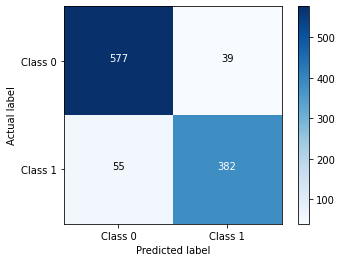

In [122]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

conf_matrix_plt = confusion_matrix(y_test,y_predict)

plt.imshow(conf_matrix_plt, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

thresh = conf_matrix_plt.max() / 2.
for i, j in np.ndindex(conf_matrix_plt.shape):
    plt.text(j, i, conf_matrix_plt[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix_plt[i, j] > thresh else "black")

plt.show()

## Visualising the Test set results

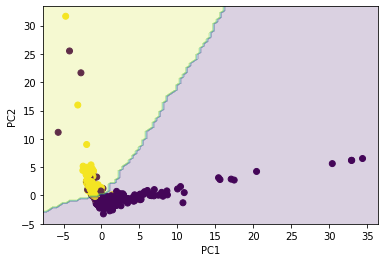

In [123]:
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)

plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Setting up the Decision Tree Model

## Spliting the dataset into features and target variable

In [ ]:
X = spamData.iloc[:, :-1] 
y = spamData.iloc[:, -1]  

## Splitting train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Cross validation 

In [ ]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

max_depth =  1 : mean accuracy =  76.8646080760095
max_depth =  2 : mean accuracy =  83.9667458432304
max_depth =  3 : mean accuracy =  87.41092636579573
max_depth =  4 : mean accuracy =  88.14726840855108
max_depth =  5 : mean accuracy =  88.6935866983373
max_depth =  6 : mean accuracy =  89.2874109263658
max_depth =  7 : mean accuracy =  89.28741092636578
max_depth =  8 : mean accuracy =  89.33491686460809
max_depth =  9 : mean accuracy =  89.21615201900238
max_depth =  10 : mean accuracy =  89.83372921615201


# Modelling

In [ ]:
spamDT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
spamDT

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
spamDT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Predictions

In [ ]:
DT_pred = spamDT.predict(X_test)

# Evaluation 

##  Accuracy Score on Testing Data set

In [ ]:
from sklearn import metrics
predictions_test =  metrics.accuracy_score(y_test, DT_pred)
print("DecisionTrees's Testing Accuracy: ",predictions_test)

DecisionTrees's Testing Accuracy:  0.89944576405384


##  Accuracy Score on Training Data set

In [ ]:
from sklearn.metrics import accuracy_score
predictions_train = spamDT.predict(X_train)
Train_acc = accuracy_score(y_train,predictions_train)
print("DecisionTrees's Training Accuracy: ",Train_acc)

DecisionTrees's Training Accuracy:  0.9233118425517476


## Confusion Matrix on Test data set

In [ ]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test, DT_pred)
confMatrix

array([[712,  25],
       [102, 424]], dtype=int64)

## Classification Report on Test data set

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       737
           1       0.94      0.81      0.87       526

    accuracy                           0.90      1263
   macro avg       0.91      0.89      0.89      1263
weighted avg       0.90      0.90      0.90      1263



# Visualization

## Plotting Confusion Matrix

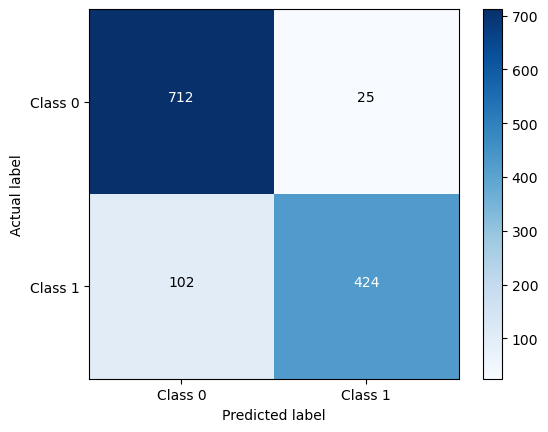

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


conf_matrix_plt = confusion_matrix(y_test,DT_pred)

plt.imshow(conf_matrix_plt, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

thresh = conf_matrix_plt.max() / 2.
for i, j in np.ndindex(conf_matrix_plt.shape):
    plt.text(j, i, conf_matrix_plt[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix_plt[i, j] > thresh else "black")

plt.show()

## Visualizing Tree

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


dot_data = StringIO()
filename = "SpamTree.png"
features = spamData.columns[0:57]
classes = list(map(str, np.unique(y_train)))
out=tree.export_graphviz(spamDT,feature_names=features, out_file=dot_data, class_names=classes, filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')